In [128]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import r2_score,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

In [129]:
data=pd.read_csv("Stroke_Prediction_Indians.csv")
data.head(5)

,ID,Age,Gender,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,...,Dietary Habits,Alcohol Consumption,Chronic Stress,Sleep Hours,Family History of Stroke,Education Level,Income Level,Stroke Risk Score,Region,Stroke Occurrence
0,1,78,Female,0,0,1,Private,Rural,267.30,36.2,...,Non-Vegetarian,0,0,11,0,Tertiary,Middle,88,South,0
1,2,60,Female,0,0,0,Private,Rural,207.24,19.8,...,Vegetarian,0,0,9,0,Secondary,High,56,East,0
2,3,69,Male,0,0,0,Private,Urban,161.30,34.5,...,Mixed,1,0,3,0,Secondary,High,63,North,1
3,4,43,Male,0,0,1,Never Worked,Urban,247.49,48.8,...,Mixed,0,1,4,0,Tertiary,Middle,93,South,0
4,5,30,Female,0,0,1,Government,Urban,116.57,31.3,...,Mixed,0,1,9,0,Secondary,High,99,West,0


In [130]:
data=data.drop(["ID"],axis=1)

In [131]:
le=LabelEncoder()
data["Education Level"]=le.fit_transform(data["Education Level"])
data["Gender"]=le.fit_transform(data["Gender"])
data["Work Type"]=le.fit_transform(data["Work Type"])
data["Residence Type"]=le.fit_transform(data["Residence Type"])
data["Dietary Habits"]=le.fit_transform(data["Dietary Habits"])
data["Income Level"]=le.fit_transform(data["Income Level"])
data["Region"]=le.fit_transform(data["Region"])
data["Physical Activity"]=le.fit_transform(data["Physical Activity"])
data["Smoking Status"]=le.fit_transform(data["Smoking Status"])

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172000 entries, 0 to 171999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       172000 non-null  int64  
 1   Gender                    172000 non-null  int64  
 2   Hypertension              172000 non-null  int64  
 3   Heart Disease             172000 non-null  int64  
 4   Ever Married              172000 non-null  int64  
 5   Work Type                 172000 non-null  int64  
 6   Residence Type            172000 non-null  int64  
 7   Average Glucose Level     172000 non-null  float64
 8   BMI                       172000 non-null  float64
 9   Smoking Status            172000 non-null  int64  
 10  Physical Activity         172000 non-null  int64  
 11  Dietary Habits            172000 non-null  int64  
 12  Alcohol Consumption       172000 non-null  int64  
 13  Chronic Stress            172000 non-null  i

<Axes: >

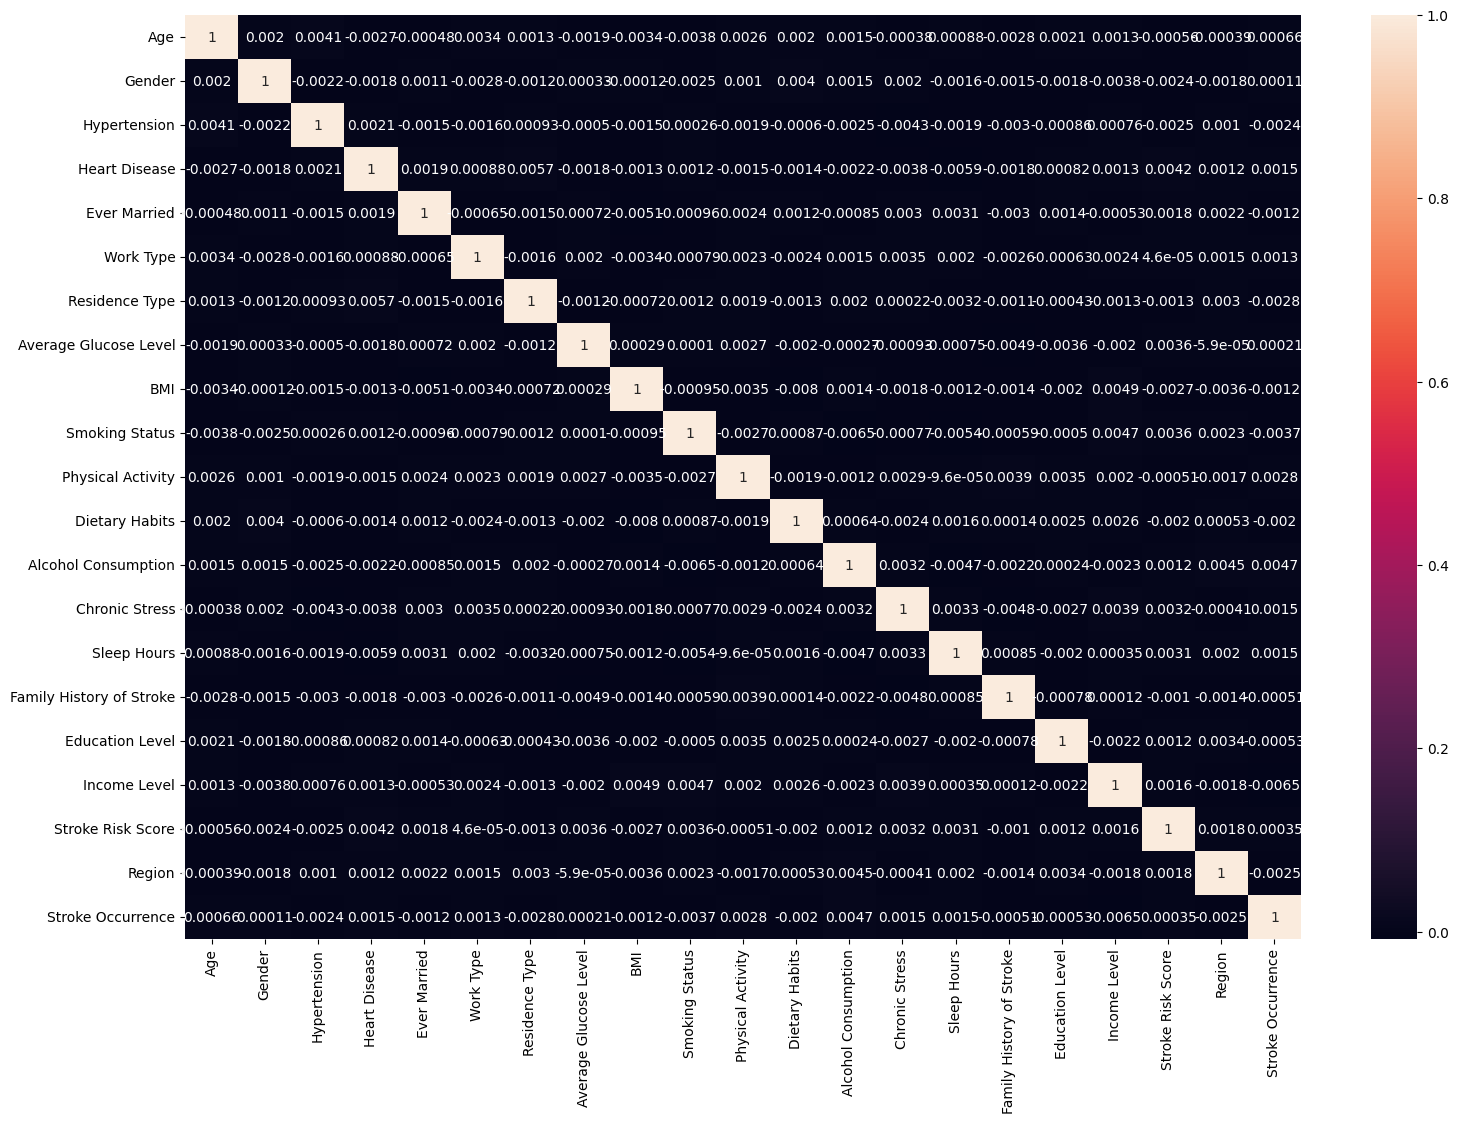

In [133]:
plt.figure(figsize=(18,12))
sns.heatmap(data.corr(),annot=True)

In [134]:
x=data.drop(["Stroke Occurrence"],axis=1)
y=data["Stroke Occurrence"]
ss=StandardScaler()
x=ss.fit_transform(x)

In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [136]:
model={
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42)
}

In [137]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42)
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    return accuracy, precision, recall, f1

In [139]:
results = []

for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, x_train, x_test, y_train, y_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy*100,
        "Precision": precision*100,
        "Recall": recall*100,
        "F1-Score": f1*100
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,89.857558,80.743808,89.857558,85.057249
1,KNN,87.656977,81.995547,87.656977,84.459596
2,Decision Tree,79.965116,81.691183,79.965116,80.806241
3,Random Forest,89.857558,80.743808,89.857558,85.057249
4,XGBoost,89.854651,80.743543,89.854651,85.055799


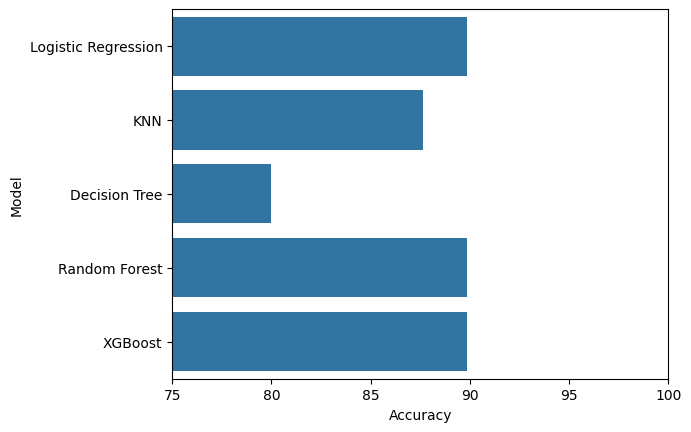

In [149]:
sns.barplot(y="Model",x="Accuracy",data=results_df)
plt.xlim(75,100)
plt.show()